# Project: Wrangling and Analyze Data

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# reading the twitter-archive-enhanced.csv file
df_1 = pd.read_csv('data/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
# make directory if it doesn't already exist
import os
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [ ]:
# download the image-predictions.tsv file from the internet
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r

In [ ]:
# save data to file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [3]:
# read the image-predictions.tsv file into a dataframe
df_2 = pd.read_csv('data/image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) <br>
Due to issues with querying data from twitter using tweepy library, the tweet_json.txt file provided is used

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# read tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
df_list = []
with open('data/tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

# create a dataframe from the list of dictionaries
df_3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

All three datasets required to complete this project have been gathered through different techniques. <br>
- Manually downloading file from a website
- Programmatically downloading file with requests library 
- Accessing file through API and API Library (tweepy) <br>

The final method was unsucessful, thus another approach was used, i.e., manually downloading the file which was made available by udacity.

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessment of df_1 `twitter_archive_enhanced.csv`

#### Visual assesment of df_1

In [5]:
df_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


HTML tags in source column of `twitter_archive_enhance` need to be removed

#### Programmatic Assesment of df_1

In [6]:
# programmatic assessment of df_1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are null values in the following columns `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls` 

In [7]:
# checking mathematical summary of df_1
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Looking into rating_numerator and rating denominator

In [8]:
# checking for rows with rating_denominator = 0
df_1[df_1['rating_denominator'] <= 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


1 row has rating_denominator set to 0 which is not realistic

In [9]:
# checking for rows with rating_numerator = 0
df_1[df_1['rating_numerator'] <= 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


2 rows have rating_numerator set to 0 which is not realistic

In [10]:
# subsetting dataframe to extract rows with rating_numerator < rating_denominator
df_1[df_1['rating_numerator'] < df_1['rating_denominator']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Investigating name column

In [11]:
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
# checking duplicated rows in df_1
df_1.tweet_id.duplicated().sum()

0

There are no duplicated tweed ids

Investigating dog types columns

In [13]:
df_1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [14]:
df_1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
df_1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
df_1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In the `twitter_archive_enhance` table, the dog type variable should form one column instead of four different columns

In [17]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
724,782747134529531904,NaN,NaN,2016-10-03 01:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Deacon. He's the happiest almost dry d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782747134...,11,10,Deacon,doggo,None,None,None
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Gingivitis Pumpernickel named Z...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669363888...,10,10,None,None,None,None,None
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
84,876484053909872640,NaN,NaN,2017-06-18 16:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876484053...,13,10,Benedict,None,None,None,None
482,815390420867969024,NaN,NaN,2017-01-01 02:53:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from the squad! 13/10 for all h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815390420...,13,10,None,None,None,None,None


There are retweets part of the dataset. Eg. index 558 is a retweet

In [18]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
811,771171053431250945,NaN,NaN,2016-09-01 02:21:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Frankie. He's wearing b...,6.733201e+17,4.196984e+09,2015-12-06 01:56:44 +0000,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
1155,724983749226668032,NaN,NaN,2016-04-26 15:29:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fred-Rick. He dabbles in parkour. The ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724983749...,12,10,Fred,None,None,None,None
1589,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,None,None,pupper,None
2056,671357843010908160,NaN,NaN,2015-11-30 15:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Tfw she says hello from the other side. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671357843...,9,10,None,None,None,None,None


In [19]:
df_1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The `source` column of the `twitter_enhance_archive` dataset has only 4 different unique values, thus, they should be categorical instead of objects

### Assessment of df_2 `predictions.tsv`

#### Visual Assesment of df_2

In [20]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Programmatic Assessment of df_2

In [21]:
# programmatic assessment of df_2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# summary statistics of df_2
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# checking for duplicated data
df_2.duplicated().sum()

0

### Assessment of df_3 `tweet_json.txt`

#### Visual assessment of df_3

In [24]:
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Programmatic assesment of df_3

In [25]:
# programmatic assessment of df_3
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [26]:
# check for duplicated tweet_id in df_3
df_3.tweet_id.duplicated().sum()

0

In [27]:
# summary statistics
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

`twitter_archive_enhance`

1. HTML tags in source column need to be removed

2. Null values in columns `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls` 

3. Null values written as 'None' in `name`, `floofer`, `doggo`, `pupper`, `puppo` columns.

4. The `timestamp` datatype should be datetime not object

5. There are retweets and replies part of the dataset which should now be the case according to the instructions

6. The `source` column has only 4 different unique values, thus, they should be categorical instead of objects

7. Some names in the `names` column were wrongly written as 'a'. These names are written as lowercase and should be corrected

8. Some numerator ratings are significantly smaller than their denominator counterparts. This is odd and does not follow the defined schema or theme of the ratings which, i.e., 11/10, 14/10 etc.

9. 1 row has rating_denominator set to 0 which is not realistic.

10. 2 rows have rating_numerator set to 0 which is not realistic.

11. The `rating_numerator` and `rating_denominator` should be of type float instead of int

12. Correctly extracting rating numerator from text column

### Tidiness issues

`twitter_archive_engance`

1. The dog stages variable should form one column instead of four different columns

2. The two ratings columns in `twitter_archive_en` should be one column

`tweet_json`

3. `tweet_json.txt` and `twitter_archive_enhance` can be combined to form a table with one observational unit, i.e., tweets and their related statistics and information (no predictions)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data

df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

*Addessing completeness issues first*

### Issue:

Null values in columns `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls` 


#### Define:

Dropping replies rows

Dropping columns `in_reply_to_status_id`, `in_reply_to_user_id`

Dropping rows with values in `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` because they are retweets. This also takes care of Issue #5

#### Code

In [29]:
# Drop rows with values in reply_to_status_id, reply_to_user_id

df_1_clean = df_1_clean[df_1_clean['in_reply_to_status_id'].isna()]

In [30]:
# Drop the following columns 'in_reply_to_status_id' and 'in_reply_to_user_id' in df_1_clean

df_1_clean = df_1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

In [31]:
# Retain the rows with NaN in retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
df_1_clean = df_1_clean[df_1_clean['retweeted_status_id'].isna()]

In [32]:
# Now drop those columns
df_1_clean = df_1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [33]:
# Check if in_reply_to_status and in_reply_to_user_id columns are present
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [34]:
# Check if rows with vaues in retweet columns still exist
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


Fixing null values for other columns happen to remove rows with null values in expanded_urls column

*Addressing tidiness issues next*

### Issue:

The dog stage variables are dsiplayed in four different columns

#### Define

The dog stages variable should form one column instead of four different columns. Combine doggo, floofer, pupper and puppo columns to one column named dog_stage

#### Code

In [35]:
#  combine floofer, pupper, and puppo columns ot one column named dog_stage

df_1_clean['dog_stages'] = df_1_clean['doggo'] + df_1_clean['floofer'] + df_1_clean['pupper'] + df_1_clean['puppo']

# replace None with empty string
df_1_clean['dog_stages'] = df_1_clean['dog_stages'].str.replace('None', "")
df_1_clean['dog_stages'] = df_1_clean['dog_stages'].str.replace('NoneNone', '')
df_1_clean['dog_stages'] = df_1_clean['dog_stages'].str.replace('NoneNoneNone', '')
df_1_clean['dog_stages'] = df_1_clean['dog_stages'].str.replace('NoneNoneNoneNone', '')

In [36]:
# drop the doggo, floofer, pupper, and puppo columns
df_1_clean = df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [37]:
df_1_clean['dog_stages'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

In [38]:
# replace empty string with NaN
df_1_clean['dog_stages'] = df_1_clean['dog_stages'].replace('', np.nan)

# replace multiple dog stages with 'multiple'
df_1_clean['dog_stages'] = df_1_clean['dog_stages'].replace('doggopupper', 'multiple')
df_1_clean['dog_stages'] = df_1_clean['dog_stages'].replace('doggopuppo', 'multiple')
df_1_clean['dog_stages'] = df_1_clean['dog_stages'].replace('doggofloofer', 'multiple')

#### Test

In [39]:
# Visual assesment
df_1_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN


In [40]:
df_1_clean.dog_stages.value_counts()

pupper      221
doggo        72
puppo        23
multiple     11
floofer       9
Name: dog_stages, dtype: int64

Solving this issue, revealed another issues of 2 dog stages given for 1 dog which is odd. This maybe be cause by there been two dogs in the picture. This is not a big issue and will be ignored.

*To address the second tidiness issue, Quality issues 8, 9 and 10 need to be addressed*

### Issue: 

Correctly extracting rating numerator from text column

Make rating_numerator and rating_denominator type float instead of int

Some numerator ratings are significantly smaller than their denominator counterparts. This is odd and does not follow the defined schema or theme of the ratings which, i.e., 11/10, 14/10 etc.

1 row has rating_denominator set to 0 which is not realistic

2 rows have rating_numerator set to 0 which is not realistic.

#### Define

Extract the correct ratings numerator from `text` column using regex

The `rating_numerator` and `rating_denominator` should be of type float instead of int

Drop these rows

#### Code

In [41]:
# extract rating_numerator correctly from text column

df_1_clean['rating_numerator'] = df_1_clean.text.str.extract('(\d+\.?\d?\d?)\/\d+', expand = True)

In [42]:
# convert the rating_numerator and rating_denominator columns to float
df_1_clean['rating_numerator'] = df_1_clean['rating_numerator'].astype(float)
df_1_clean['rating_denominator'] = df_1_clean['rating_denominator'].astype(float)

In [43]:
# drop the rows with rating_denominator = 0
df_1_clean = df_1_clean[df_1_clean['rating_denominator'] > 0]

# drop the rows with rating_numerator = 0
df_1_clean = df_1_clean[df_1_clean['rating_numerator'] > 0]

In [44]:
# drop the rows with rating_numerator < rating_denominator
df_1_clean = df_1_clean[df_1_clean['rating_numerator'] >= df_1_clean['rating_denominator']]

#### Test

In [45]:
df_1_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.677000e+03,1677.000000,1677.000000
mean,7.488638e+17,13.353029,10.534884
std,6.845418e+16,45.009521,7.357606
min,6.660508e+17,10.000000,7.000000
25%,6.844601e+17,10.000000,10.000000
50%,7.367361e+17,11.000000,10.000000
75%,8.066291e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


### Issue: 

The two ratings columns in `twitter_archive_en` should be one column

#### Define

Create a new column called rating and drop the two rating columns to make data analysis easier

#### Code

In [46]:
# create a new column 'rating' by dividing rating_numerator by rating_denominator
df_1_clean['rating'] = df_1_clean['rating_numerator'] / df_1_clean['rating_denominator']

# drop the rating_numerator and rating_denominator columns
df_1_clean = df_1_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

#### Test

In [47]:
# Visual assesment
df_1_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2


### Issue: 

`tweet_json.txt` and `twitter_archive_enhance` can be combined to form a table with one observational unit, i.e., tweets and their related statistics and information (no predictions)

#### Define
Merge tweet_json and twitter_archive_enhance to form a single table

#### Code

In [48]:
# merge df_1_clean and df_3_clean on tweet_id
df_4_clean = pd.merge(df_1_clean, df_3_clean, on = 'tweet_id', how = 'inner')

#### Test

In [49]:
# Visual assesment
df_4_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,rating,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,8853,39467


In [50]:
df_4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1677 non-null   int64  
 1   timestamp       1677 non-null   object 
 2   source          1677 non-null   object 
 3   text            1677 non-null   object 
 4   expanded_urls   1674 non-null   object 
 5   name            1677 non-null   object 
 6   dog_stages      292 non-null    object 
 7   rating          1677 non-null   float64
 8   retweet_count   1677 non-null   int64  
 9   favorite_count  1677 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 144.1+ KB


At this point, all tidiness issues have been solved

### Issue: 
HTML tags in source column need to be removed

The source column has only 4 different unique values, thus, they should be categorical instead of objects

#### Define

Remove HTML tags from source column using regex

#### Code

In [51]:
df_4_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1563
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          84
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       20
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [52]:
# extract the source from the source column
df_4_clean['source'] = df_4_clean['source'].str.extract('<a href="(.*)" rel=".*')

In [53]:
# make the source column categorical
df_4_clean['source'] = df_4_clean['source'].astype('category')

In [54]:
# Making the source column more readable
df_4_clean['source'] = df_4_clean['source'].replace('http://twitter.com/download/iphone', 'Twitter for iPhone')
df_4_clean['source'] = df_4_clean['source'].replace('http://vine.co', 'Vine')
df_4_clean['source'] = df_4_clean['source'].replace('http://twitter.com', 'Twitter Web Client')
df_4_clean['source'] = df_4_clean['source'].replace('https://about.twitter.com/products/tweetdeck', 'TweetDeck')

#### Test

In [55]:
df_4_clean.source.value_counts()

Twitter for iPhone    1563
Vine                    84
Twitter Web Client      20
TweetDeck               10
Name: source, dtype: int64

In [56]:
df_4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        1677 non-null   int64   
 1   timestamp       1677 non-null   object  
 2   source          1677 non-null   category
 3   text            1677 non-null   object  
 4   expanded_urls   1674 non-null   object  
 5   name            1677 non-null   object  
 6   dog_stages      292 non-null    object  
 7   rating          1677 non-null   float64 
 8   retweet_count   1677 non-null   int64   
 9   favorite_count  1677 non-null   int64   
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 132.9+ KB


### Issue: 
The `timestamp` datatype should be datetime not object

#### Define
Convert timestamp column to datetime

#### Code

In [57]:
# convert timestamp to datetime
df_4_clean['timestamp'] = pd.to_datetime(df_4_clean['timestamp'])

#### Test

In [58]:
# programmatic assessment
df_4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1677 non-null   int64              
 1   timestamp       1677 non-null   datetime64[ns, UTC]
 2   source          1677 non-null   category           
 3   text            1677 non-null   object             
 4   expanded_urls   1674 non-null   object             
 5   name            1677 non-null   object             
 6   dog_stages      292 non-null    object             
 7   rating          1677 non-null   float64            
 8   retweet_count   1677 non-null   int64              
 9   favorite_count  1677 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 132.9+ KB


### Issue: 

Some names in the names column were wrongly written as 'a'. These names are written as lowercase and should be corrected

#### Define
Set all names with value lowercase letters to null

Null values written as None

#### Code

In [59]:
# set all names with lowercase letters to NaN

df_4_clean['name'] = df_4_clean['name'].str.replace('^[a-z]+', 'None')

C:\Users\Cyril\AppData\Local\Temp/ipykernel_13812/2250664328.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_4_clean['name'] = df_4_clean['name'].str.replace('^[a-z]+', 'None')


In [60]:
# set all names with value "None" to NaN
df_4_clean['name'] = df_4_clean['name'].replace('None', np.nan)

#### Test

In [61]:
# programmatic assessment
df_4_clean.name.value_counts()

Charlie    11
Lucy       10
Cooper      9
Oliver      9
Tucker      8
           ..
Stormy      1
Balto       1
Mairi       1
Loomis      1
Lugan       1
Name: name, Length: 789, dtype: int64

All recorded quality issues have been solved

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

As a requirement for the project, a tidy master dataset is required. The master dataset is the combination of the three datasets provided. The master dataset is saved as `twitter_archive_master.csv`

In [62]:
# merging all three dataframes
df_master = pd.merge(df_4_clean, df_2_clean, on = 'tweet_id', how = 'inner')

In [63]:
# store the master dataframe in a csv file
df_master.to_csv('twitter_archive_master.csv', index = False)

In [64]:
# stor the df_4_clean dataframe in a csv file
df_4_clean.to_csv('twitter_archive_tweet_info.csv', index = False)

## Analyzing and Visualizing Data

**ALL ANALYSIS WERE MADE ON CLEANED DATA**

In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Insights in the twitter_archive_tweet_info dataset

In [65]:
df_4_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,rating,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,8853,39467


In [66]:
# most common and least common dog stages

df_4_clean.dog_stages.value_counts()

pupper      182
doggo        69
puppo        22
multiple     10
floofer       9
Name: dog_stages, dtype: int64

In [67]:
# dog (name)/stage with the most favorite_count
df_4_clean[df_4_clean['retweet_count'] == df_4_clean['retweet_count'].max()]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,rating,retweet_count,favorite_count
796,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,doggo,1.3,79515,131075


Insights in twitter_master dataset

In [68]:
df_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,rating,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


It can be noticed that there are some erros in the predictions, this however won't be addressed at the momemnt

In [69]:
# the most common dog prediction
df_master.p1.value_counts()

golden_retriever      130
Labrador_retriever     86
Pembroke               83
Chihuahua              62
chow                   41
                     ... 
giant_panda             1
silky_terrier           1
Madagascar_cat          1
maillot                 1
desktop_computer        1
Name: p1, Length: 282, dtype: int64

In [70]:
# the most common dog name
df_master.name.value_counts()

Charlie    11
Lucy       10
Cooper      9
Oliver      9
Tucker      8
           ..
Rizzo       1
Mattie      1
Pinot       1
Dallas      1
Lugan       1
Name: name, Length: 770, dtype: int64

### Insights:
1. The most common dog stage is pupper

2. The least common dog stage is floofer

3. The dog stage with the highest retweet count is a doggo

4. The golden retriever is the most predicted dog breed 

5. The most common dog name is Charlie

6. The least common dog names are Lugan, Dallas, Pinot, Mattie and Rizzo

### Visualization

Visualize the distribution of tweet sources from `twitter_archive_tweet_info` dataset

In [71]:
df_4_clean['source'].value_counts()

Twitter for iPhone    1563
Vine                    84
Twitter Web Client      20
TweetDeck               10
Name: source, dtype: int64

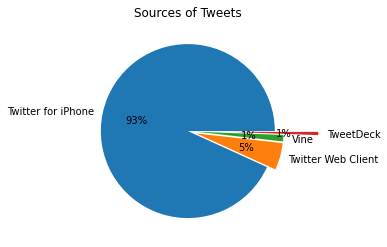

In [75]:
labels = df_4_clean['source'].unique()
plt.pie(df_4_clean['source'].value_counts(), labels = labels, autopct='%.0f%%', explode = (0, 0.1, 0.1, 0.5))
plt.title('Sources of Tweets')
plt.show()

Most tweets were made with an Iphone with the least tweets coming from Vine and TweetDeck

Visualize number of tweets per year

In [77]:
# extract year from timestamp
df_4_clean['year'] = df_4_clean['timestamp'].dt.year

In [78]:
# group by year and count the number of tweets
df_4_clean.groupby('year')['tweet_id'].count()

year
2015    398
2016    906
2017    373
Name: tweet_id, dtype: int64

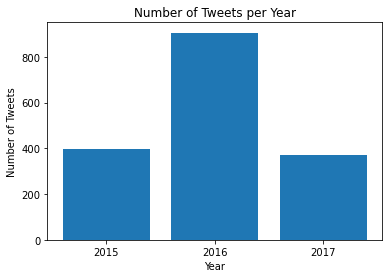

In [79]:
# plot the number of tweets per year with matplotlib

plt.bar(df_4_clean.groupby('year')['tweet_id'].count().index, df_4_clean.groupby('year')['tweet_id'].count())
plt.xticks(df_4_clean.groupby('year')['tweet_id'].count().index)
plt.title('Number of Tweets per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.show()

2016 had the most number of tweets with 2017 having the least number of tweets

### References

1. https://help.start.gg/en/articles/1987102-customizing-text-with-markdown#:~:text=Aligning%20Text,the%20text%20in%20div%20tags.

2. https://www.w3schools.com/PYTHON/matplotlib_pie_charts.asp

3. https://www.digitalocean.com/community/tutorials/pandas-merge-two-dataframe